In [9]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Population Distribution and Parameter

In [11]:
music = Table.read_table('music.csv')
music_bins = np.arange(0, 800, 25)

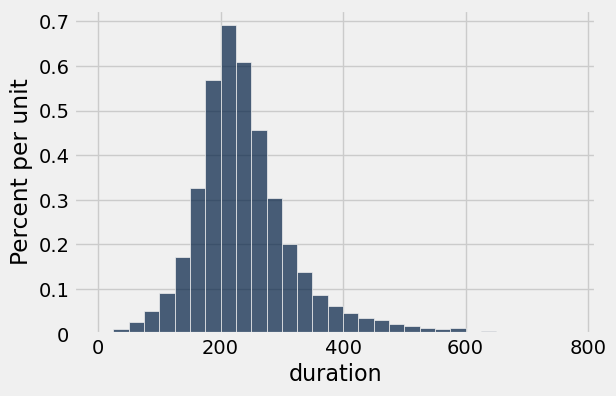

In [12]:
# (Population) Probability Distribution
music.hist('duration', bins=music_bins)

In [13]:
# (Population) Parameter
np.median(music.column('duration'))

227.53299999999999

## Statistics

In [14]:
# (Sample) Statistic
np.median(music.sample(10).column('duration'))

247.64150000000001

In [15]:
# (Sample) Statistic
np.median(music.sample(100).column('duration'))

231.67349999999999

### Empirical Distributions of a Statistic

In [16]:
def sample_median(size):
    return np.median(music.sample(size).column('duration'))

In [17]:
sample_median(10)

219.89350000000002

In [18]:
num_simulations = 5000

In [20]:
sample_medians_array = make_array()

for i in np.arange(num_simulations):
    new_median = sample_median(10)
    sample_medians_array = np.append(sample_medians_array, new_median)

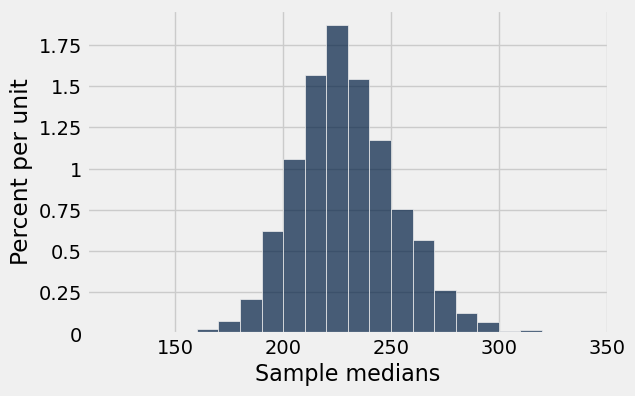

In [21]:
Table().with_column(
    'Sample medians', sample_medians_array
).hist(bins = np.arange(120,350, 10))

#### Empirical Distributions Overlayed

In [22]:
sample_medians_array_10 = make_array()
sample_medians_array_100 = make_array()
sample_medians_array_1000 = make_array()

num_simulations = 5000

for i in np.arange(num_simulations):
    sample_medians_array_10 = np.append(
        sample_medians_array_10, 
        sample_median(10)
    )
    
    sample_medians_array_100 = np.append(
        sample_medians_array_100, 
        sample_median(100)
    )
    
    sample_medians_array_1000 = np.append(
        sample_medians_array_1000, 
        sample_median(1000)
    )

In [23]:
sample_medians = Table().with_columns('Size 10', sample_medians_array_10, 
                                      'Size 100', sample_medians_array_100,
                                      'Size 1000', sample_medians_array_1000)

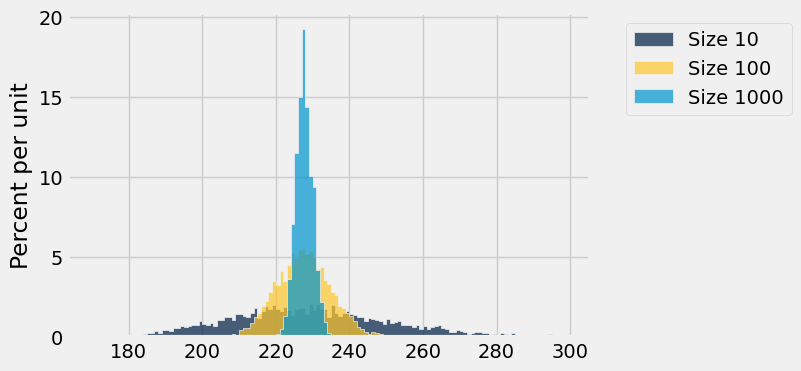

In [24]:
sample_medians.hist(bins = np.arange(170,300, 1))

## Mendel and Pea Flowers ##

In [25]:
## Mendel had 929 plants, of which 709 had purple flowers
observed_purples = 709 / 929
observed_purples

0.7631862217438106

In [26]:
abs(observed_purples * 100 - 75)

1.318622174381062

In [27]:
predicted_proportions = make_array(.75, .25)
sample_proportions(929, predicted_proportions)

array([ 0.74919268,  0.25080732])

In [28]:
def purple_flowers():
    return sample_proportions(929, predicted_proportions).item(0) * 100

In [35]:
purple_flowers()

74.3810548977395

In [30]:
purples = make_array()

for i in np.arange(10000):
    new_purple = purple_flowers()
    purples = np.append(purples, new_purple)

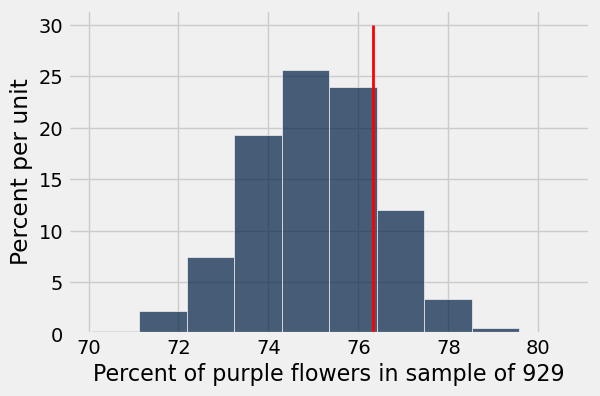

In [38]:
Table().with_column('Percent of purple flowers in sample of 929', purples).hist()
plots.plot([observed_purples*100, observed_purples*100], [0, .3], color='red', lw=2);

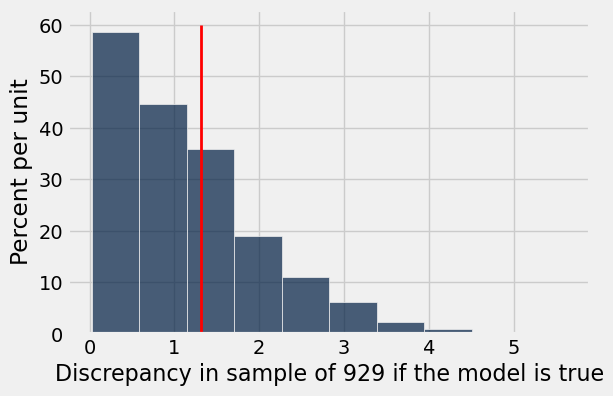

In [39]:
Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75)).hist()
plots.plot([abs(observed_purples * 100 - 75), abs(observed_purples * 100 - 75)], [0, .6], color='red', lw=2);

In [40]:
Discrepancy = Table().with_column('Discrepancy in sample of 929 if the model is true', abs(purples- 75))
Discrepancy.where(
    'Discrepancy in sample of 929 if the model is true', 
    are.above_or_equal_to(abs(observed_purples * 100 - 75))
).num_rows / 10000

0.36

## Swain vs. Alabama ##

In [41]:
population_proportions = make_array(.26, .74)
population_proportions

array([ 0.26,  0.74])

In [42]:
sample_proportions(100, population_proportions)

array([ 0.21,  0.79])

In [43]:
def panel_proportion():
    return sample_proportions(100, population_proportions).item(0)

In [44]:
panel_proportion()

0.23

In [45]:
panels = make_array()

num_simulations = 10000

for i in np.arange(num_simulations):
    new_panel = panel_proportion() * 100
    panels = np.append(panels, new_panel)

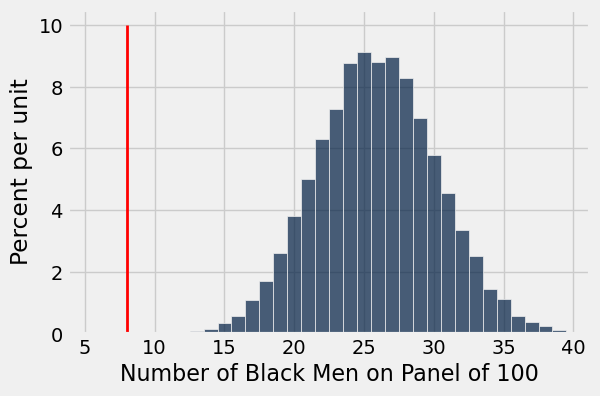

In [46]:
Table().with_column('Number of Black Men on Panel of 100', panels).hist(bins=np.arange(5.5,40.))
plots.plot([8, 8], [0, .1], color='red', lw=2);

In [47]:
Black_men_on_panel = Table().with_column('Number of Black Men on Panel of 100', panels)
Black_men_on_panel.where('Number of Black Men on Panel of 100', are.below(9)).num_rows / num_simulations

0.0

In [48]:
min(panels)

11.0